In [1]:
# Imports
import json
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Config
devEUI = 'deadbeefdead0064'
EXP_PATH = "exp/exp_device_7"
UPLINK_PATH = f'{EXP_PATH}/uplink_{devEUI}.json'
DOWNLINK_PATH = f'{EXP_PATH}/downlink_{devEUI}.json'
DATA_PATH = f'{EXP_PATH}/data_{devEUI}.json'

In [3]:

'''

df = pd.read_json(DOWNLINK_PATH)
#df.info()

df = df['downlinkFrame']
gateways = []
sf = []
for d in df :
    print(d)
    sf.append(d['txInfo']['loRaModulationInfo']['spreadingFactor'])
    gateways.append(d['gatewayID'])
print(gateways)
'''
pass

In [4]:
'''
# Gateways utilization


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

ax.bar(langs,[gateways.count('3235313214003900'),gateways.count('323531322a004700')])
plt.show()
'''
pass

In [5]:
'''
# SF Downlink Utilization

num_bins = 6
n, bins, patches = plt.hist(sf, num_bins, facecolor='blue', alpha=0.5)
plt.show()'''
pass

In [6]:

#Data Extraction
'''
df = pd.read_json(DATA_PATH)
#df.info()

#print(df)
gateways = []
sf = []
downlinks = df['downlinkFrame'].dropna()
uplinks = df['uplinkFrame'].dropna()
downlinks_data = []
uplinks_data = []

for d in downlinks :
    downlinks_data.append(d)
for d in uplinks :
    uplinks_data.append(d)
        
print(len(downlinks_data))
print(len(uplinks_data))'''
pass

In [7]:
'''def get_downlink_parameters(downlinks):
    gateways =[]
    sf =[]
    mac_dr  =[]
    for down in downlinks:
        if down ['phyPayloadJSON']['mhdr']['mType'] == 'UnconfirmedDataDown' :
            gateways.append(down['gatewayID'])
            sf.append(down['txInfo']['loRaModulationInfo']['spreadingFactor'])
            mac_dr.append(down ['phyPayloadJSON']['macPayload']['fhdr']['fOpts'][0]['payload']['dataRate'])
    return gateways, sf, mac_dr


def get_uplink_parameters(uplinks):
    sf =  []
    ch  =[]
    tp = []
    for up in uplinks:
        ch.append(up['txInfo'] ['frequency'])
        sf.append(up['txInfo'] ['loRaModulationInfo']['spreadingFactor'])
    return sf, ch
up_sf, up_ch =  get_uplink_parameters(uplinks)

def dr_to_sf(dr):
    sf = [12,11,10,9,8,7]
    for i in range(len(dr)) :
        dr[i] = sf[dr[i]]
    return dr

down_gateways, down_sf, dr_down =  get_downlink_parameters(downlinks)
print(dr_down)'''

pass

In [8]:

'''
down_gateways, down_sf, down_dr =  get_downlink_parameters(downlinks)
down_dr = dr_to_sf(dr_down)
print(down_dr)
up_sf, up_ch =  get_uplink_parameters(uplinks)

num_bins = 6
#n, bins, patches = plt.hist(down_dr, num_bins, facecolor='green', alpha=0.5)
#n, bins, patches = plt.hist(down_sf, num_bins, facecolor='blue', alpha=0.5)
n, bins, patches = plt.hist(up_sf, num_bins, facecolor='red', alpha=0.5)
plt.show()'''

pass

In [9]:
'''def count_sf(sfs ):
    counts =[]
    for sf in range (7,13):
        counts.append(sfs.count(sf))
    return counts

up_sf_counts = count_sf(up_sf)
down_sf_counts = count_sf(down_dr)'''
pass

In [10]:
'''import numpy as np
import matplotlib.pyplot as plt
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, up_sf_counts, width, color='blue',alpha=0.5)
ax.bar(ind, down_sf_counts, width,bottom=up_sf_counts, color='red',alpha=1)
ax.set_ylabel('Frames')
ax.set_title('Frames by SF and Message Type')
ax.set_xticks(ind, ('SF7', 'SF8', 'SF9', 'SF10', 'SF11','SF12'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Uplink', 'Downlink'])
plt.savefig('img/up_down.png')
plt.show()'''
pass

In [11]:
'''fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

pps = ax.bar(langs,[down_gateways.count('3235313214003900'),down_gateways.count('323531322a004700')],color = 'blue',alpha=0.5)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(down_gateways)*100)),
      ha='center')
ax.set_ylabel('Downlink Frames')
ax.set_title('Downlink Frames by Gateway')
plt.savefig('img/gateways.png')
plt.show()'''
pass

In [12]:


'''
up_sf, up_ch =  get_uplink_parameters(uplinks)
up_ch = np.array(up_ch)
up_ch = up_ch/10**6

channels = set(up_ch)
#print(up_ch)



channel_counts = []
for ch in channels:
    channel_counts.append(np.count_nonzero(up_ch == ch))
    
channels = np.array(channels)
print(type(channels))
channels = ['868.1', '868.3', '867.5', '868.5']
print(channels)
print(channel_counts)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(channels,channel_counts,color = 'blue',alpha=0.5)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(up_ch)*100)),
      ha='center')
ax.set_ylabel('Uplink Frames')
ax.set_title('Uplink Frames by Channel')
plt.savefig('img/up_ch.png')
plt.show()'''
pass

In [13]:

devEUI = 'dead2483dead0003'
EXP_PATH = "exp/exp_device_7"

DATA_PATH = f'{EXP_PATH}/data_{devEUI}.json'


#Data Extraction

df = pd.read_json(DATA_PATH)
#df.info()

#print(df)
gateways = []
sf = []
downlinks = df['downlinkFrame'].dropna()
uplinks = df['uplinkFrame'].dropna()
downlinks_data = []
uplinks_data = []

for d in downlinks :
    downlinks_data.append(d)
for d in uplinks :
    uplinks_data.append(d)
        
print(len(downlinks_data))
print(len(uplinks_data))
#print(downlinks_data)

35
155


In [14]:
def get_downlink_parameters(downlinks):
    gateways =[]
    sf =[]
    mac_dr  =[]
    for down in downlinks:
        if down ['phyPayloadJSON']['mhdr']['mType'] == 'UnconfirmedDataDown' :
            gateways.append(down['gatewayID'])
            sf.append(down['txInfo']['loRaModulationInfo']['spreadingFactor'])
            mac_dr.append(down ['phyPayloadJSON']['macPayload']['fhdr']['fOpts'][0]['payload']['dataRate'])
    return gateways, sf, mac_dr


def get_uplink_parameters(uplinks):
    sf =  []
    ch  =[]
    tp = []
    for up in uplinks:
        ch.append(up['txInfo'] ['frequency'])
        sf.append(up['txInfo'] ['loRaModulationInfo']['spreadingFactor'])
    return sf, ch
up_sf, up_ch =  get_uplink_parameters(uplinks)

def dr_to_sf(dr):
    sf = [12,11,10,9,8,7]
    for i in range(len(dr)) :
        dr[i] = sf[dr[i]]
    return dr

down_gateways, down_sf, dr_down =  get_downlink_parameters(downlinks)
print(dr_down)


[5, 5, 4, 4, 3, 2, 2, 2, 2, 1, 1, 0, 5, 5, 5, 5, 3, 2, 2, 1, 0, 0, 2, 2, 2, 3, 3, 5, 5, 0, 0, 5, 5, 0, 0]


[7, 7, 8, 8, 9, 10, 10, 10, 10, 11, 11, 12, 7, 7, 7, 7, 9, 10, 10, 11, 12, 12, 10, 10, 10, 9, 9, 7, 7, 12, 12, 7, 7, 12, 12]


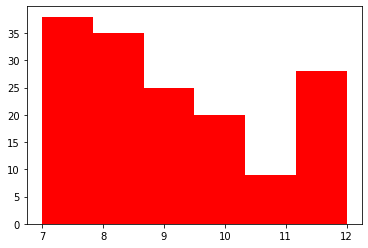

In [15]:
down_gateways, down_sf, down_dr =  get_downlink_parameters(downlinks)
down_dr = dr_to_sf(dr_down)
print(down_dr)
up_sf, up_ch =  get_uplink_parameters(uplinks)

num_bins = 6
#n, bins, patches = plt.hist(down_dr, num_bins, facecolor='green', alpha=0.5)
#n, bins, patches = plt.hist(down_sf, num_bins, facecolor='blue', alpha=0.5)
n, bins, patches = plt.hist(up_sf, num_bins, facecolor='red', alpha=1)
plt.show()

In [16]:
def count_sf(sfs ):
    counts =[]
    for sf in range (7,13):
        counts.append(sfs.count(sf))
    return counts

up_sf_counts = count_sf(up_sf)
down_sf_counts = count_sf(down_dr)

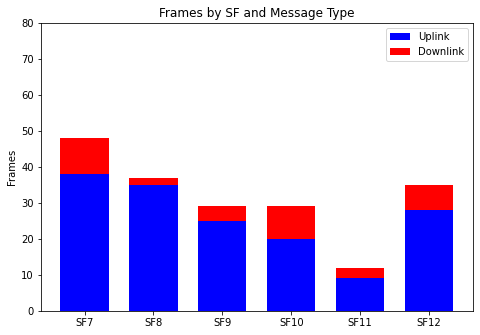

In [17]:
import numpy as np
import matplotlib.pyplot as plt
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, up_sf_counts, width, color='blue',alpha=1)
ax.bar(ind, down_sf_counts, width,bottom=up_sf_counts, color='red',alpha=1)
ax.set_ylabel('Frames')
ax.set_title('Frames by SF and Message Type')
ax.set_xticks(ind, ('SF7', 'SF8', 'SF9', 'SF10', 'SF11','SF12'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Uplink', 'Downlink'])
plt.savefig('img/up_down.png')
plt.show()

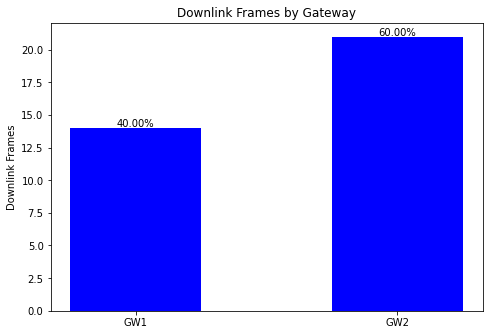

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

pps = ax.bar(langs,[down_gateways.count('3235313214003900'),down_gateways.count('323531323f007000')],width = 0.5,color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(down_gateways)*100)),
      ha='center')
ax.set_ylabel('Downlink Frames')
ax.set_title('Downlink Frames by Gateway')
plt.savefig('img/gateways.png')
plt.show()

<class 'numpy.ndarray'>
['867.3', '868.1', ' 867.9', '868.5', '867.1', '868.3', '867.7', '867.5']
[2, 3, 3, 41, 46, 2, 1, 57]


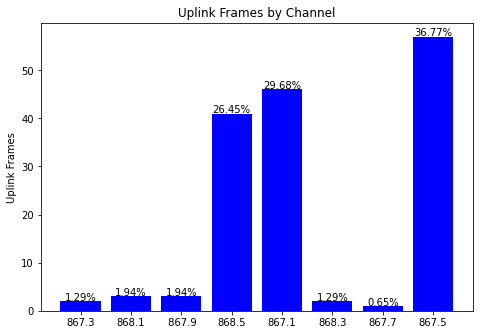

In [19]:
up_sf, up_ch =  get_uplink_parameters(uplinks)
up_ch = np.array(up_ch)
up_ch = up_ch/10**6

channels = set(up_ch)
#print(up_ch)



channel_counts = []
for ch in channels:
    channel_counts.append(np.count_nonzero(up_ch == ch))
    
channels = np.array(channels)
print(type(channels))
channels = ['867.3', '868.1',' 867.9', '868.5', '867.1', '868.3', '867.7', '867.5']
print(channels)
print(channel_counts)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(channels,channel_counts,color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(up_ch)*100)),
      ha='center')
ax.set_ylabel('Uplink Frames')
ax.set_title('Uplink Frames by Channel')
plt.savefig('img/up_ch.png')
plt.show()

In [20]:

devEUI = 'dead2483dead0003'
EXP_PATH = "exp/exp_device_12"

DATA_PATH = f'{EXP_PATH}/data_{devEUI}.json'


#Data Extraction

df = pd.read_json(DATA_PATH)
#df.info()

#print(df)
gateways = []
sf = []
downlinks = df['downlinkFrame'].dropna()
uplinks = df['uplinkFrame'].dropna()
downlinks_data = []
uplinks_data = []

for d in downlinks :
    downlinks_data.append(d)
for d in uplinks :
    uplinks_data.append(d)
        
print(len(downlinks_data))
print(len(uplinks_data))
#print(downlinks_data)

51
142


In [21]:
def get_downlink_parameters(downlinks):
    gateways =[]
    sf =[]
    mac_dr  =[]
    for down in downlinks:
        if down ['phyPayloadJSON']['mhdr']['mType'] == 'UnconfirmedDataDown' :
            gateways.append(down['gatewayID'])
            sf.append(down['txInfo']['loRaModulationInfo']['spreadingFactor'])
            mac_dr.append(down ['phyPayloadJSON']['macPayload']['fhdr']['fOpts'][0]['payload']['dataRate'])
    return gateways, sf, mac_dr


def get_uplink_parameters(uplinks):
    sf =  []
    ch  =[]
    tp = []
    for up in uplinks:
        ch.append(up['txInfo'] ['frequency'])
        sf.append(up['txInfo'] ['loRaModulationInfo']['spreadingFactor'])
    return sf, ch
up_sf, up_ch =  get_uplink_parameters(uplinks)

def dr_to_sf(dr):
    sf = [12,11,10,9,8,7]
    for i in range(len(dr)) :
        dr[i] = sf[dr[i]]
    return dr

down_gateways, down_sf, dr_down =  get_downlink_parameters(downlinks)
print(dr_down)

[5, 5, 3, 2, 2, 1, 1, 0, 0, 0, 0, 5, 4, 3, 2, 0, 2, 4, 5, 5, 5, 5, 0, 0, 4, 4, 3, 3, 2, 2, 1, 0, 0, 2, 2, 3, 4, 5, 5, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0]


[7, 7, 9, 10, 10, 11, 11, 12, 12, 12, 12, 7, 8, 9, 10, 12, 10, 8, 7, 7, 7, 7, 12, 12, 8, 8, 9, 9, 10, 10, 11, 12, 12, 10, 10, 9, 8, 7, 7, 12, 12, 12, 12, 7, 7, 12, 12, 12, 12, 12, 12]


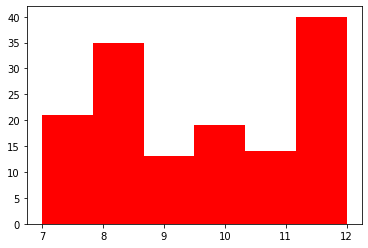

In [22]:
down_gateways, down_sf, down_dr =  get_downlink_parameters(downlinks)
down_dr = dr_to_sf(dr_down)
print(down_dr)
up_sf, up_ch =  get_uplink_parameters(uplinks)

num_bins = 6
#n, bins, patches = plt.hist(down_dr, num_bins, facecolor='green', alpha=0.5)
#n, bins, patches = plt.hist(down_sf, num_bins, facecolor='blue', alpha=0.5)
n, bins, patches = plt.hist(up_sf, num_bins, facecolor='red', alpha=1)
plt.show()

In [23]:
def count_sf(sfs ):
    counts =[]
    for sf in range (7,13):
        counts.append(sfs.count(sf))
    return counts

up_sf_counts = count_sf(up_sf)
down_sf_counts = count_sf(down_dr)

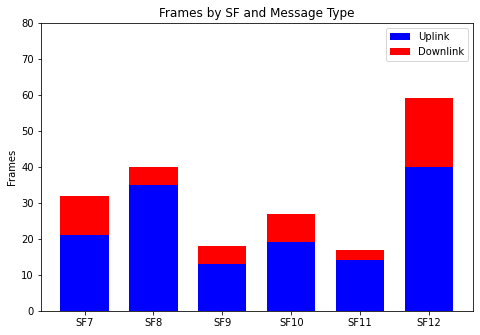

In [24]:
import numpy as np
import matplotlib.pyplot as plt
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, up_sf_counts, width, color='blue',alpha=1)
ax.bar(ind, down_sf_counts, width,bottom=up_sf_counts, color='red',alpha=1)
ax.set_ylabel('Frames')
ax.set_title('Frames by SF and Message Type')
ax.set_xticks(ind, ('SF7', 'SF8', 'SF9', 'SF10', 'SF11','SF12'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Uplink', 'Downlink'])
#plt.savefig('img/up_down.png')
plt.show()

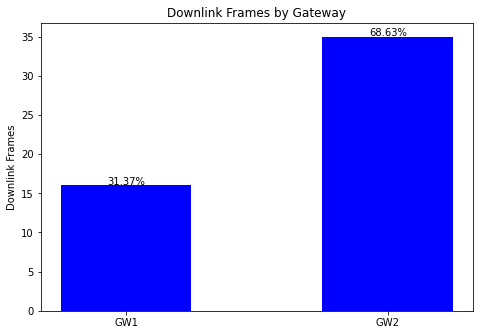

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

pps = ax.bar(langs,[down_gateways.count('3235313214003900'),down_gateways.count('323531323f007000')],width = 0.5,color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(down_gateways)*100)),
      ha='center')
ax.set_ylabel('Downlink Frames')
ax.set_title('Downlink Frames by Gateway')
#plt.savefig('img/gateways.png')
plt.show()

{867.1, 868.5, 867.9, 868.1, 867.3, 867.5, 867.7, 868.3}
['867.1', '868.5', ' 867.9', '868.1', '867.3', '867.5', '867.7', '868.3']
[1, 37, 2, 56, 2, 1, 1, 42]


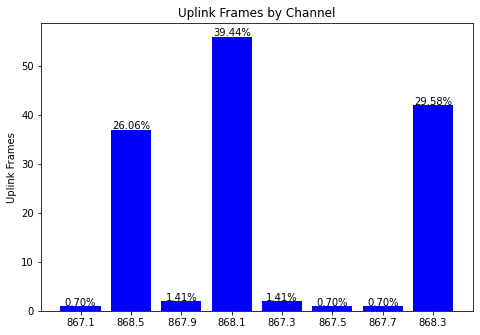

In [26]:
up_sf, up_ch =  get_uplink_parameters(uplinks)
up_ch = np.array(up_ch)
up_ch = up_ch/10**6

channels = set(up_ch)
print(channels)



channel_counts = []
for ch in channels:
    channel_counts.append(np.count_nonzero(up_ch == ch))
    
channels = np.array(channels)

channels = ['867.1', '868.5',' 867.9', '868.1', '867.3', '867.5', '867.7', '868.3']
print(channels)
print(channel_counts)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(channels,channel_counts,color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(up_ch)*100)),
      ha='center')
ax.set_ylabel('Uplink Frames')
ax.set_title('Uplink Frames by Channel')
#plt.savefig('img/up_ch.png')
plt.show()

In [27]:

down_processed = []
for d in downlinks_data :
    fOpts = d['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(fOpts)
    if(len(fOpts) == 1):
        fOpts = fOpts [0]
        chMask = fOpts['payload']['chMask']
        if (sum(chMask) == 1):
            down_processed.append(d)
            
print(len(down_processed))
print('Downlinks : ',len(downlinks_data))

24
Downlinks :  51


In [28]:
count = 0
count_ack_dr = 0
count_ack_tp = 0
count_ack_ch = 0
count_valid_up = 0
fCnt_save = -1
for u in uplinks_data:
    fOpts = u['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(u['phyPayloadJSON']['macPayload']['fhdr']['fOpts'])
    fCnt = u['phyPayloadJSON']['macPayload']['fhdr']['fCnt']
    if (fCnt >fCnt_save ):
        count_valid_up = count_valid_up +1
        if (fOpts != None):
            count = count +1
            #print( u['phyPayloadJSON']['macPayload']['fhdr']['fCnt'])
            #print()
            for op in fOpts:
                if (op['payload']['dataRateAck']):
                    count_ack_dr = count_ack_dr +1
                if (op['payload']['powerAck']):
                    count_ack_tp = count_ack_tp +1
                if (op['payload']['channelMaskAck']):
                    count_ack_ch = count_ack_ch +1
    fCnt_save = fCnt
            

print(count)
print (count_ack_dr)
print (count_ack_tp)
print (count_ack_ch)
print('valide Up: ',count_valid_up )

35
38
38
38
valide Up:  132


In [29]:
# Downlink Extraction Rate

down_extraction_rate = (count / len(downlinks_data) )*100
print(f'Downlink Extraction Rate: {down_extraction_rate}%')

Downlink Extraction Rate: 68.62745098039215%


In [30]:

devEUI = 'dead2483dead0001'
EXP_PATH = "exp/exp_device_12"

DATA_PATH = f'{EXP_PATH}/data_{devEUI}.json'


#Data Extraction

df = pd.read_json(DATA_PATH)
#df.info()

#print(df)
gateways = []
sf = []
downlinks = df['downlinkFrame'].dropna()
uplinks = df['uplinkFrame'].dropna()
downlinks_data = []
uplinks_data = []

for d in downlinks :
    downlinks_data.append(d)
for d in uplinks :
    uplinks_data.append(d)
        
print(len(downlinks_data))
print(len(uplinks_data))
#print(downlinks_data)

62
321


In [31]:
def get_downlink_parameters(downlinks):
    gateways =[]
    sf =[]
    mac_dr  =[]
    for down in downlinks:
        if down ['phyPayloadJSON']['mhdr']['mType'] == 'UnconfirmedDataDown' :
            gateways.append(down['gatewayID'])
            sf.append(down['txInfo']['loRaModulationInfo']['spreadingFactor'])
            mac_dr.append(down ['phyPayloadJSON']['macPayload']['fhdr']['fOpts'][0]['payload']['dataRate'])
    return gateways, sf, mac_dr


def get_uplink_parameters(uplinks):
    sf =  []
    ch  =[]
    tp = []
    for up in uplinks:
        ch.append(up['txInfo'] ['frequency'])
        sf.append(up['txInfo'] ['loRaModulationInfo']['spreadingFactor'])
    return sf, ch
up_sf, up_ch =  get_uplink_parameters(uplinks)

def dr_to_sf(dr):
    sf = [12,11,10,9,8,7]
    for i in range(len(dr)) :
        dr[i] = sf[dr[i]]
    return dr

down_gateways, down_sf, dr_down =  get_downlink_parameters(downlinks)
print(dr_down)

[5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 5, 5, 4, 4, 3, 3, 2, 2, 2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4, 5, 5, 0, 4, 4, 3, 3, 2, 2, 2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4, 5, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0]


In [32]:
def count_sf(sfs ):
    counts =[]
    for sf in range (7,13):
        counts.append(sfs.count(sf))
    return counts

up_sf_counts = count_sf(up_sf)
down_sf_counts = count_sf(down_dr)

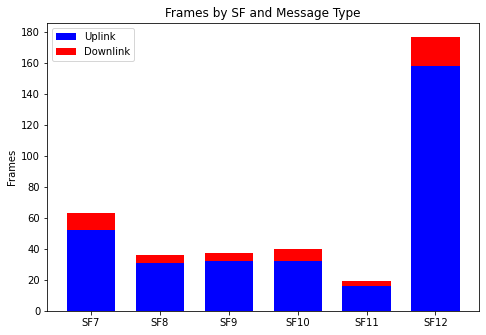

<Figure size 432x288 with 0 Axes>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, up_sf_counts, width, color='blue',alpha=1)
ax.bar(ind, down_sf_counts, width,bottom=up_sf_counts, color='red',alpha=1)
ax.set_ylabel('Frames')
ax.set_title('Frames by SF and Message Type')
ax.set_xticks(ind, ('SF7', 'SF8', 'SF9', 'SF10', 'SF11','SF12'))
ax.set_yticks(np.arange(0, 200, 20))
ax.legend(labels=['Uplink', 'Downlink'])
#plt.savefig('img/up_down.png')
plt.show()
plt.savefig('img/up_down_n1.png')

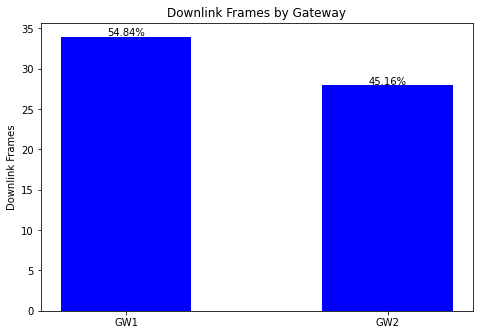

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

pps = ax.bar(langs,[down_gateways.count('3235313214003900'),down_gateways.count('323531323f007000')],width = 0.5,color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(down_gateways)*100)),
      ha='center')
ax.set_ylabel('Downlink Frames')
ax.set_title('Downlink Frames by Gateway')
#plt.savefig('img/gateways.png')
plt.show()

{867.9, 867.5, 867.7, 868.5, 867.1, 868.1, 867.3, 868.3}
<class 'numpy.ndarray'>
['867.9', '867.5', '867.7', '868.5', '867.1', '868.1', '867.3', '868.3']
[1, 2, 4, 105, 3, 107, 3, 96]


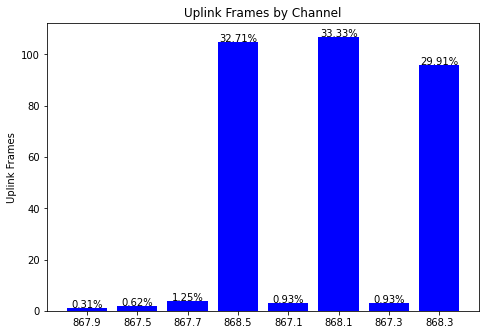

In [35]:
up_sf, up_ch =  get_uplink_parameters(uplinks)
up_ch = np.array(up_ch)
up_ch = up_ch/10**6

channels = set(up_ch)
print(channels)



channel_counts = []
for ch in channels:
    channel_counts.append(np.count_nonzero(up_ch == ch))
    
channels = np.array(channels)
print(type(channels))
channels = ['867.9', '867.5', '867.7', '868.5', '867.1', '868.1', '867.3', '868.3']
print(channels)
print(channel_counts)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(channels,channel_counts,color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(up_ch)*100)),
      ha='center')
ax.set_ylabel('Uplink Frames')
ax.set_title('Uplink Frames by Channel')
#plt.savefig('img/up_ch.png')
plt.show()

In [36]:
down_processed = []
for d in downlinks_data :
    fOpts = d['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(fOpts)
    if(len(fOpts) == 1):
        fOpts = fOpts [0]
        chMask = fOpts['payload']['chMask']
        if (sum(chMask) == 1):
            down_processed.append(d)
            
print(len(down_processed))
print('Downlinks : ',len(downlinks_data))

30
Downlinks :  62


In [37]:
count = 0
count_ack_dr = 0
count_ack_tp = 0
count_ack_ch = 0
count_valid_up = 0
fCnt_save = -1
for u in uplinks_data:
    fOpts = u['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(u['phyPayloadJSON']['macPayload']['fhdr']['fOpts'])
    fCnt = u['phyPayloadJSON']['macPayload']['fhdr']['fCnt']
    if (fCnt >fCnt_save ):
        count_valid_up = count_valid_up +1
        if (fOpts != None):
            count = count +1
            #print( u['phyPayloadJSON']['macPayload']['fhdr']['fCnt'])
            #print()
            for op in fOpts:
                if (op['payload']['dataRateAck']):
                    count_ack_dr = count_ack_dr +1
                if (op['payload']['powerAck']):
                    count_ack_tp = count_ack_tp +1
                if (op['payload']['channelMaskAck']):
                    count_ack_ch = count_ack_ch +1
    fCnt_save = fCnt
            

print(count)
print (count_ack_dr)
print (count_ack_tp)
print (count_ack_ch)
print('valide Up: ',count_valid_up )

57
57
57
57
valide Up:  287


In [38]:
# Downlink Extraction Rate

down_extraction_rate = (count / len(downlinks_data) )*100
print(f'Downlink Extraction Rate: {down_extraction_rate}%')

Downlink Extraction Rate: 91.93548387096774%


In [39]:

devEUI = 'dead2483dead0002'
EXP_PATH = "exp/exp_device_12"

DATA_PATH = f'{EXP_PATH}/data_{devEUI}.json'


#Data Extraction

df = pd.read_json(DATA_PATH)
#df.info()

#print(df)
gateways = []
sf = []
downlinks = df['downlinkFrame'].dropna()
uplinks = df['uplinkFrame'].dropna()
downlinks_data = []
uplinks_data = []

for d in downlinks :
    downlinks_data.append(d)
for d in uplinks :
    uplinks_data.append(d)
        
print(len(downlinks_data))
print(len(uplinks_data))
#print(downlinks_data)

62
366


In [40]:
def get_downlink_parameters(downlinks):
    gateways =[]
    sf =[]
    mac_dr  =[]
    for down in downlinks:
        if down ['phyPayloadJSON']['mhdr']['mType'] == 'UnconfirmedDataDown' :
            gateways.append(down['gatewayID'])
            sf.append(down['txInfo']['loRaModulationInfo']['spreadingFactor'])
            mac_dr.append(down ['phyPayloadJSON']['macPayload']['fhdr']['fOpts'][0]['payload']['dataRate'])
    return gateways, sf, mac_dr


def get_uplink_parameters(uplinks):
    sf =  []
    ch  =[]
    tp = []
    for up in uplinks:
        ch.append(up['txInfo'] ['frequency'])
        sf.append(up['txInfo'] ['loRaModulationInfo']['spreadingFactor'])
    return sf, ch
up_sf, up_ch =  get_uplink_parameters(uplinks)

def dr_to_sf(dr):
    sf = [12,11,10,9,8,7]
    for i in range(len(dr)) :
        dr[i] = sf[dr[i]]
    return dr

down_gateways, down_sf, dr_down =  get_downlink_parameters(downlinks)
print(dr_down)

[5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 5, 5, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4, 5, 5, 0, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4, 5, 5, 0, 0, 0, 0, 0, 0, 5, 5, 0]


In [41]:
def count_sf(sfs ):
    counts =[]
    for sf in range (7,13):
        counts.append(sfs.count(sf))
    return counts

up_sf_counts = count_sf(up_sf)
down_sf_counts = count_sf(down_dr)

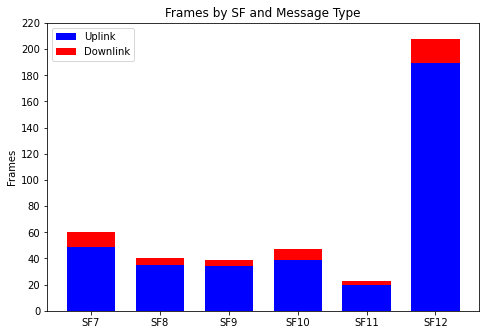

In [42]:
import numpy as np
import matplotlib.pyplot as plt
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, up_sf_counts, width, color='blue',alpha=1)
ax.bar(ind, down_sf_counts, width,bottom=up_sf_counts, color='red',alpha=1)
ax.set_ylabel('Frames')
ax.set_title('Frames by SF and Message Type')
ax.set_xticks(ind, ('SF7', 'SF8', 'SF9', 'SF10', 'SF11','SF12'))
ax.set_yticks(np.arange(0, 240, 20))
ax.legend(labels=['Uplink', 'Downlink'])
#plt.savefig('img/up_down.png')
plt.show()

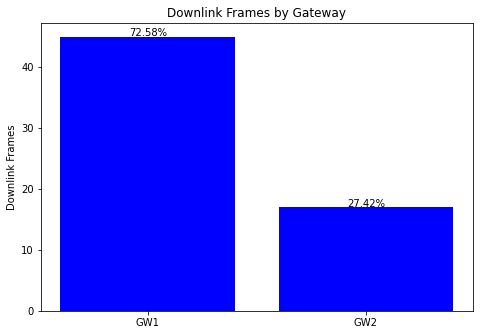

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

pps = ax.bar(langs,[down_gateways.count('3235313214003900'),down_gateways.count('323531323f007000')],color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(down_gateways)*100)),
      ha='center')
ax.set_ylabel('Downlink Frames')
ax.set_title('Downlink Frames by Gateway')
#plt.savefig('img/gateways.png')
plt.show()

{867.1, 867.5, 867.3, 868.3, 868.1, 867.7, 868.5}
<class 'numpy.ndarray'>
['867.1', '867.5', '867.3', '868.3', '868.1', '867.7', '868.5']
[1, 1, 1, 60, 235, 1, 67]


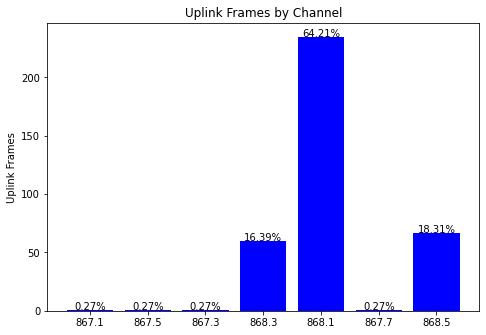

In [44]:
up_sf, up_ch =  get_uplink_parameters(uplinks)
up_ch = np.array(up_ch)
up_ch = up_ch/10**6

channels = set(up_ch)
print(channels)



channel_counts = []
for ch in channels:
    channel_counts.append(np.count_nonzero(up_ch == ch))
    
channels = np.array(channels)
print(type(channels))
channels = ['867.1', '867.5', '867.3', '868.3', '868.1', '867.7', '868.5']
print(channels)
print(channel_counts)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(channels,channel_counts,color = 'blue',alpha=1)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(up_ch)*100)),
      ha='center')
ax.set_ylabel('Uplink Frames')
ax.set_title('Uplink Frames by Channel')
#plt.savefig('img/up_ch.png')
plt.show()

In [45]:
down_processed = []
for d in downlinks_data :
    fOpts = d['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(fOpts)
    if(len(fOpts) == 1):
        fOpts = fOpts [0]
        chMask = fOpts['payload']['chMask']
        if (sum(chMask) == 1):
            down_processed.append(d)
            
print(len(down_processed))
print('Downlinks : ',len(downlinks_data))

30
Downlinks :  62


In [46]:
count = 0
count_ack_dr = 0
count_ack_tp = 0
count_ack_ch = 0
count_valid_up = 0
fCnt_save = -1
for u in uplinks_data:
    fOpts = u['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(u['phyPayloadJSON']['macPayload']['fhdr']['fOpts'])
    fCnt = u['phyPayloadJSON']['macPayload']['fhdr']['fCnt']
    if (fCnt >fCnt_save ):
        count_valid_up = count_valid_up +1
        if (fOpts != None):
            count = count +1
            #print( u['phyPayloadJSON']['macPayload']['fhdr']['fCnt'])
            #print()
            for op in fOpts:
                if (op['payload']['dataRateAck']):
                    count_ack_dr = count_ack_dr +1
                if (op['payload']['powerAck']):
                    count_ack_tp = count_ack_tp +1
                if (op['payload']['channelMaskAck']):
                    count_ack_ch = count_ack_ch +1
    fCnt_save = fCnt
            

print(count)
print (count_ack_dr)
print (count_ack_tp)
print (count_ack_ch)
print('valide Up: ',count_valid_up )

54
54
54
54
valide Up:  341


In [47]:
# Downlink Extraction Rate

down_extraction_rate = (count / len(downlinks_data) )*100
print(f'Downlink Extraction Rate: {down_extraction_rate}%')

Downlink Extraction Rate: 87.09677419354838%


DER Node 1 : 95.9866220735786
DER Node 2 : 95.51820728291317
DER Node 3 : 76.74418604651163


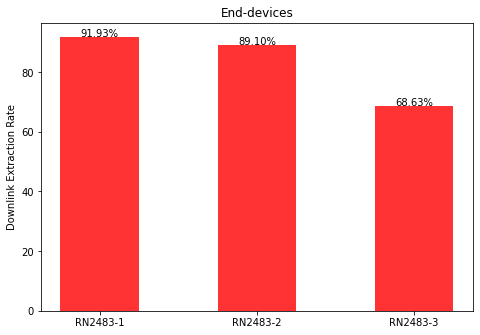

In [68]:
der_node1 = (287 /299 )*100
print('DER Node 1 :',der_node1)
der_node2 = (341/357) *100
print('DER Node 2 :',der_node2)
der_node3 = (132/172)*100
print('DER Node 3 :',der_node3)

der =  [der_node1,der_node2,der_node3]
devices = ['RN2483-1','RN2483-2','RN2483-3']
#down_der = [91.93,87.096, 68.627]
down_der = [91.93,89.096, 68.627]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(devices,down_der,width=0.5, color = 'red',alpha=0.8)

j = 0
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format(down_der[j]),
      ha='center')
    j=j+1
ax.set_ylabel('Downlink Extraction Rate')
ax.set_title('End-devices')
#plt.savefig('img/gateways.png')
plt.show()

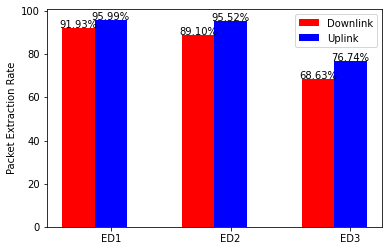

In [72]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)



rects1 = ax.bar(ind, down_der, width, color='r')

rects3 = ax.bar(ind+width, der, width, color='b')

ax.set_ylabel('Packet Extraction Rate')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('ED1','ED2','ED3') )
ax.legend( (rects1[0], rects3[0]), ('Downlink', 'Uplink') )

def autolabel(pps, data):
    j = 0
    for p in pps:
        height = p.get_height()
        ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
          s="{:.2f}%".format(data[j]),
          ha='center')
        j=j+1

autolabel(rects1,down_der)

autolabel(rects3,der)

plt.show()

In [70]:
diff = []
i = 0
for l in der :
    diff.append(l-down_der[i])
    i = i+ 1
print(diff)
    

[4.056622073578595, 6.422207282913163, 8.117186046511634]
